In [13]:
import keras.models
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten
import os

In [14]:
# Key:
# 0 - Down
# 1 - Up
# 2 - Wave

small_to_large_image_size_ratio = 0.05

X_train = []
X_test = []
Y_train = []
Y_test = []

source_directory = "dataset/real_images/thumbsdown/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(0)

source_directory = "dataset/real_images/thumbsup/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(1)

source_directory = "dataset/real_images/wave/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(2)

source_directory = "dataset/real_images/thumbsdown/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(0)

source_directory = "dataset/real_images/thumbsup/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(1)

source_directory = "dataset/real_images/wave/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)
    X_test.append(image)
    Y_test.append(2)


print(np.shape(X_train))
print(np.shape(X_test))

(1542, 54, 96)
(154, 54, 96)


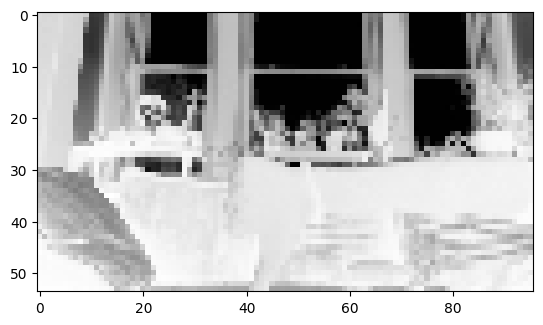

In [15]:
train_size = np.shape(X_train)
imheight = train_size[1]
imwidth = train_size[2]
train_size = train_size[0]
test_size = np.shape(X_test)[0]

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(train_size, imheight, imwidth, 1)
X_test = X_test.reshape(test_size, imheight, imwidth, 1)
Y_train = Y_train.reshape(train_size)
Y_test = Y_test.reshape(test_size)

plt.imshow(X_train[151].reshape(imheight, imwidth),cmap='Greys')

In [16]:
model = Sequential()

# add model layers
# model.add(GaussianNoise(0.01, input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(4, kernel_size=5, activation='relu'))
model.add(Conv2D(2, kernel_size=7, activation='relu'))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 52, 94, 8)         80        
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 90, 4)         804       
                                                                 
 conv2d_11 (Conv2D)          (None, 42, 84, 2)         394       
                                                                 
 dropout_3 (Dropout)         (None, 42, 84, 2)         0         
                                                                 
 flatten_3 (Flatten)         (None, 7056)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 21171     
                                                                 
Total params: 22,449
Trainable params: 22,449
Non-trai

In [17]:
n_epochs = 10
history = model.fit(x=X_train,y=Y_train, epochs=n_epochs)

Epoch 1/10
49/49 [==============================] - 4s 69ms/step - loss: 3.4467 - accuracy: 0.9105
Epoch 2/10
49/49 [==============================] - 3s 68ms/step - loss: 2.3192e-10 - accuracy: 1.0000
Epoch 3/10
49/49 [==============================] - 3s 68ms/step - loss: 3.0923e-10 - accuracy: 1.0000
Epoch 4/10
49/49 [==============================] - 3s 69ms/step - loss: 7.7308e-11 - accuracy: 1.0000
Epoch 5/10
49/49 [==============================] - 3s 68ms/step - loss: 1.5462e-10 - accuracy: 1.0000
Epoch 6/10
49/49 [==============================] - 3s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
49/49 [==============================] - 3s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
49/49 [==============================] - 3s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
49/49 [==============================] - 3s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
49/49 [==============================] - 3s 68ms/step - loss: 1.5

In [18]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 17ms/step - loss: 0.6619 - accuracy: 0.7468
Test accuracy: 0.7467532753944397


In [19]:
model.save("CNN_real_image_model")
saved_model = keras.models.load_model("CNN_real_image_model")
score = saved_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

INFO:tensorflow:Assets written to: CNN_real_image_model\assets


INFO:tensorflow:Assets written to: CNN_real_image_model\assets


5/5 [==============================] - 0s 20ms/step - loss: 0.6619 - accuracy: 0.7468
Test accuracy: 0.7467532753944397
